# Project Title


## Box Office Breakdown: Data-Driven Insights for Smarter Movie Production


Business Problem


Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

##  Goals :
Are certain  movie directors more likely to have more movie votes?

How do genre and ratings impact a movie’s revenue?

What genres tend to perform best at the box office (domestically and globally)Is there a relation

What patterns can be observed in successful movies, and how can these patterns inform production choices for a new studio?

Which original languages are more popular in movie production?

Which movies had the highest vote count on release date?



## Data

### Data Understanding 

The dataset was compiled from multiple reputable sources, including Box Office Mojo, IMDb, Rotten Tomatoes, The Movie DB, and The Numbers. It encompasses 1,764 films and includes diverse file formats such as CSV, TSV, and a SQLite database. Key components of the dataset include the movie_basics and movie_ratings tables from IMDb, along with box office gross data extracted from a compressed CSV file.
The dataset contains 12 core columns that provide a comprehensive view of each film, including title, studio, runtime, genre, popularity, release date, audience rating, production budget, and gross revenue.

The primary goal of the analysis is to uncover meaningful trends in production budgets, gross earnings, and audience ratings. These insights will support strategic decision-making for a new movie studio, enabling it to identify profitable genres and themes. By aligning content production with market demand and audience preferences, the studio can optimize its investment and increase the likelihood of producing successful original video content.



### Loading Datasets

In [22]:
# Importing Libraries

import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pathlib import Path
import zipfile

#import statsmodels.formula.api as smf
#import statsmodels.api as sm
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#from statsmodels.stats.stattools import durbin_watson
#from scipy.stats import shapiro, probplot

#import warnings
#warnings.filterwarnings("ignore")

%matplotlib inline

Loading im db

In [23]:
def unzip_data(filename, extract_to='.'):
    with zipfile.ZipFile(filename, "r") as zip_ref:
        zip_ref.extractall(extract_to)

# Unzip the file
unzip_data('zippedData/im.db.zip', extract_to='Data')

# Establish a connection to the database
conn = sqlite3.connect('Data/im.db')

# Check available tables (optional, good for understanding structure)
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [3]:
# Load the movies gross data into a DataFrame
bom=pd.read_csv("Data/bom.movie_gross.csv")
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
tmdb=pd.read_csv("Data/tmdb.movies.csv")
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
# load the movie info data into a DataFrame
movie_info = pd.read_csv("Data/rt.movie_info.tsv", sep='\t')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [6]:
# Load the reviews data into a DataFrame with a compatible encoding
reviews = pd.read_csv("Data/Rotten_tomatoes_critic_reviews.csv", sep='\t', encoding='ISO-8859-1')
reviews.head()

,"rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content"
0,"m/0814255,Andrew L. Urban,False,Urban Cinefile..."
1,"m/0814255,Louise Keller,False,Urban Cinefile,F..."
2,"m/0814255,,False,FILMINK (Australia),Fresh,,20..."
3,"m/0814255,Ben McEachen,False,Sunday Mail (Aust..."
4,"m/0814255,Ethan Alter,True,Hollywood Reporter,..."


In [7]:
#loading tmdb.movies data into a DataFrame
rt_movies = pd.read_csv("Data/rotten_tomatoes_movies.csv")
rt_movies.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [8]:
# load the tn.movie_budgets data into a DataFrame
tn_movie_budgets = pd.read_csv("Data/tn.movie_budgets.csv")
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Data Cleaning and Preprocessing

## Methods

### Language vs popularity in Box office
The `original_language` column provides insights into which languages (such as English, Spanish, etc.) lead in box office performance, helping inform strategic decisions about which languages to focus on during production—whether to appeal to a global audience or target growing regional markets. Meanwhile, the `popularity` column reflects viewer interest and engagement, indicating which films are gaining attention and momentum. Analyzing both variables together can reveal trends linking language, audience interest, and the likelihood of box office success.


In [10]:
tmdb.info()
# Check for missing values in tmdb DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [11]:
# top 5 original languages in box office data
language_counts = tmdb['original_language'].value_counts().reset_index()
language_counts.columns = ['original_language', 'popularity']

language_counts.head()

,original_language,popularity
0,en,23291
1,fr,507
2,es,455
3,ru,298
4,ja,265


There is no missing values from the original_language and popularity columns hence there are no additional data cleaning processes needed

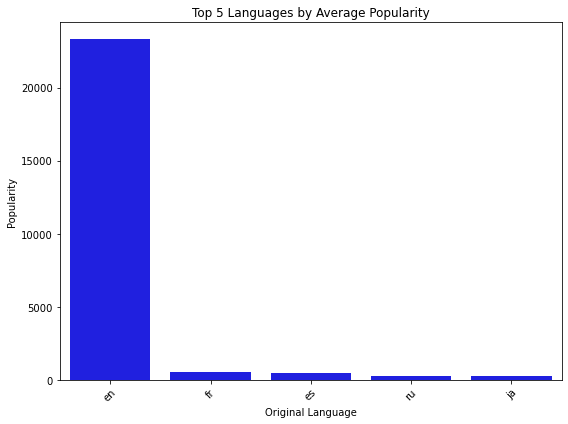

In [12]:
#plotting a bar chart of top 5 popular original language movies
#Group by language and compute mean popularity


# Step 2: Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='original_language', y='popularity', data=language_counts.head(5),color="blue")
plt.title('Top 5 Languages by Average Popularity')
plt.xlabel('Original Language')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Results: From the bar chart, we conclude that the top five most popular languages are English (en),french(fr), spanish(es),russian(ru) and japanesse(ja) 

respctively.

Recommendation: From data analysis, we recommend movies to be produced in English(en) since it is most popular original language in the box office.

Top 5 movie directors with the highest movie revenue generation

In [13]:
budgets=tn_movie_budgets[['movie', 'worldwide_gross']].copy()
budgets.head(20)

,movie,worldwide_gross
0,Avatar,"$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$1,045,663,875"
2,Dark Phoenix,"$149,762,350"
3,Avengers: Age of Ultron,"$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$1,316,721,747"
5,Star Wars Ep. VII: The Force Awakens,"$2,053,311,220"
6,Avengers: Infinity War,"$2,048,134,200"
7,Pirates of the Caribbean: At Worldâs End,"$963,420,425"
8,Justice League,"$655,945,209"
9,Spectre,"$879,620,923"


Didn't use the Box office Mojo data as there is tn_movie_budgets since it had complete info

In [24]:
# Joining directors and movie_ratings tables to get average ratings and number of movies directed by each director
#joining directors and movie_ratings tables
results=conn.execute("""
SELECT DISTINCT 
    persons.primary_name AS Director_Name,
    movie_basics.original_title AS Movie
FROM directors
JOIN persons ON directors.person_id = persons.person_id
JOIN movie_basics ON directors.movie_id = movie_basics.movie_id;



             """).fetchall()
# Convert to DataFrame
df = pd.DataFrame(results, columns=["Director_Name", "movie"])

df.head()

,Director_Name,movie
0,Tony Vitale,Life's a Beach
1,Bill Haley,Steve Phoenix: The Untold Story
2,Jay Chandrasekhar,The Babymakers
3,Albert Pyun,Bulletface
4,Joe Baile,Bulletface


In [25]:


combined_df = pd.merge(df, budgets, on='movie', how='inner')
combined_df.head(10)

,Director_Name,movie,worldwide_gross
0,Rod Lurie,Straw Dogs,"$11,253,821"
1,Taylor Hackford,Love Ranch,"$146,149"
2,Roger Michell,Morning Glory,"$59,795,070"
3,Chris Tyrrell,The Joneses,"$3,541,565"
4,Moby Longinotto,The Joneses,"$3,541,565"
5,Adam Shankman,Rock of Ages,"$61,031,932"
6,Christopher Morris,Four Lions,"$2,436,111"
7,Ralph Fiennes,Coriolanus,"$2,179,623"
8,Barry Avrich,Coriolanus,"$2,179,623"
9,Tom Brady,Bucky Larson: Born to Be a Star,"$2,529,395"


Budget vs performace

H0= Prodcuction budget has no  effect on movie performance

H1= Production budget has effect on movie performance

## Testing the relationship between production_budget and worldwide gross

In [26]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [27]:
# Select relevant columns and copy them
data = tn_movie_budgets[['production_budget', 'worldwide_gross']].copy()

print(data.dtypes)

production_budget    object
worldwide_gross      object
dtype: object


In [28]:
# changing the data type of 'production_budget' 
data['production_budget'] = data['production_budget'].replace('[\$,]', '', regex=True)



In [29]:
# Convert 'worldwide_gross' to numeric
data['worldwide_gross'] = data['worldwide_gross'].replace('[\$,]', '', regex=True)
data['worldwide_gross'] = pd.to_numeric(data['worldwide_gross'], errors='coerce')

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

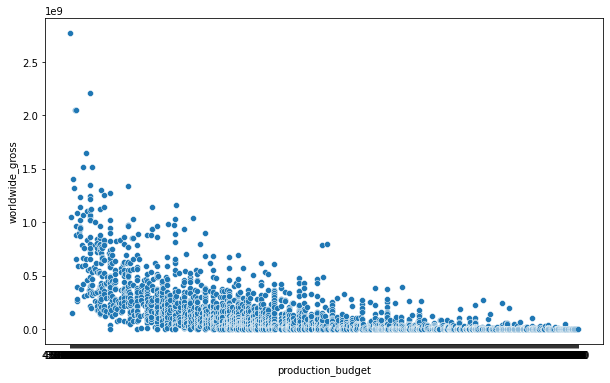

In [31]:
# Create the scatter plot
plt.figure(figsize=(10, 6))  # Optional: improves plot size/readability
sns.scatterplot(x=data['production_budget'], y=data['worldwide_gross'])
sns.regplot(x=data['production_budget'], y=data['worldwide_gross'], scatter=False, color='red')


# Add plot title and labels
plt.title('Production Budget vs Worldwide Gross', fontsize=14)
plt.xlabel('Production Budget (USD)', fontsize=12)
plt.ylabel('Worldwide Gross (USD)', fontsize=12)
plt.ylabel('Worldwide Gross')
plt.show()

Alpha= 0.05

In [32]:
# calculating the t-test statistic value and p-value
t_statistic, p_value = stats.ttest_ind(data['production_budget'], data['worldwide_gross'], equal_var=False)
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

TypeError: unsupported operand type(s) for /: 'str' and 'int'

Since the p-value (2.99e-135) is less than alpha (0.05), we reject the null hypothesis (H₀). This indicates that there is strong statistical evidence of a significant relationship between production_budget and worldwide_gross.

### Genre vs Audience ratings
Understanding the relationship between film genres and audience ratings offers valuable insights into viewer preferences and box office trends. By analyzing how different genres are rated by audiences, we can identify which types of films resonate most with viewers and potentially drive higher box office performance. This information is crucial for head of departments when making strategic decisions about content creation, marketing, and target demographics.

In [33]:
# Displaying information about the rt_movies DataFrame
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

The dataset contained missing values ranging from 1% to 9% across most columns, with the exception of critic_census, which had approximately 44% missing data. For the purpose of analyzing which genres resonate most with audiences, data cleaning involved dropping rows with missing values in the genre and audience_ratings columns to ensure the analysis was based on complete and reliable records.

In [34]:
df=rt_movies[['genres', 'audience_rating','tomatometer_rating']].copy()
cleaned_df = df.dropna(subset=['audience_rating', 'genres','tomatometer_rating'])
cleaned_df.sort_index(inplace=True)
# Displaying the first few rows of the cleaned DataFrame
cleaned_df.head()

,genres,audience_rating,tomatometer_rating
0,"Action & Adventure, Comedy, Drama, Science Fic...",53.0,49.0
1,Comedy,64.0,87.0
2,"Comedy, Romance",53.0,67.0
3,"Classics, Drama",97.0,100.0
4,"Action & Adventure, Drama, Kids & Family",74.0,89.0


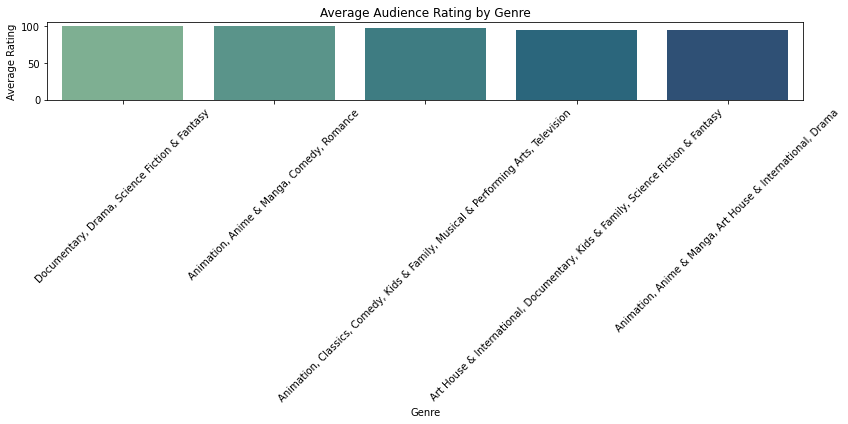

In [35]:
# Step 1: Split and explode genres (if movies have multiple genres)
cleaned_df = cleaned_df.assign(genres=cleaned_df['genres'].str.split('|')).explode('genres')

# Step 2: Group by genre and calculate average audience rating
genre_ratings = cleaned_df.groupby('genres')['audience_rating'].mean().sort_values(ascending=False).head(5).reset_index()

# Step 3: Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='audience_rating', data=genre_ratings, palette='crest')
plt.title('Average Audience Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Results

### Business Recommendation 1

### Business Recommendation 2

### Business Recommendation 3